<a href="https://colab.research.google.com/github/nataliachmurak/colourisation/blob/main/Landscapes_GAN_RGB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [194]:
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import os
#colour schemes
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.color import rgb2gray
from skimage.io import imsave, imread
from skimage import io
from skimage.transform import resize
import os

# The batch size we'll use for training
batch_size = 64

# Size of the image required to train our model
img_size = 128

# These many images will be used from the data archive
dataset_split = 4200

master_dir = 'drive/MyDrive/kaggle_dataset'


x = []
y = []
for image_file in os.listdir( master_dir )[ 0 : dataset_split ]:
    rgb_image = Image.open( os.path.join( master_dir , image_file ) ).resize( ( img_size , img_size ) )
    rgb_img_array = (np.asarray( rgb_image ) ) / 255
    gray_image = rgb_image.convert( 'L' )
    gray_img_array = ( np.asarray( gray_image ).reshape( ( img_size , img_size , 1 ) ) ) / 255
    x.append( gray_img_array )
    y.append( rgb_img_array )


# Train-test splitting
train_x, test_x, train_y, test_y = train_test_split( np.array(x), np.array(y), test_size=0.1 )
print(train_x.shape)
print(train_y.shape)
# Construct tf.data.Dataset object
dataset = tf.data.Dataset.from_tensor_slices( ( train_x , train_y ) )
dataset = dataset.batch( batch_size )

(3761, 128, 128, 1)
(3761, 128, 128, 3)


In [188]:
def get_generator_model():
    layers = [
    tf.keras.layers.Input( shape=( 128 , 128 , 1 ) ),

    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1),
    tf.keras.layers.Conv2D( 32 , kernel_size=( 3 , 3 ) , strides=1),
    tf.keras.layers.LeakyReLU(),

    tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.LeakyReLU(),

    tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 ),
    tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1 ),
    tf.keras.layers.LeakyReLU(),

    tf.keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=1 ),
    tf.keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ), strides=1 ),
    tf.keras.layers.LeakyReLU(),
    

    tf.keras.layers.Conv2DTranspose( 256 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.Conv2DTranspose( 256 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2DTranspose( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.Conv2DTranspose( 128 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2DTranspose( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    
    #tf.keras.layers.Conv2DTranspose( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    #tf.keras.layers.Conv2DTranspose( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2DTranspose( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2DTranspose( 16 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.Conv2DTranspose( 8 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    
    #tf.keras.layers.Conv2DTranspose( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu'),
    #tf.keras.layers.Conv2DTranspose( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu'),
    tf.keras.layers.Conv2DTranspose( 3 , kernel_size=( 5 , 5 ) , strides=1 , activation='tanh') ]
    #layers = [
     # tf.keras.layers.InputLayer(input_shape=(128, 128, 1)),
      #tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
      #tf.keras.layers.LeakyReLU(),
      #tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
      #tf.keras.layers.LeakyReLU(),
      #tf.keras.layers.BatchNormalization(),
      #tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
      #tf.keras.layers.LeakyReLU(),
      #tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
      #tf.keras.layers.LeakyReLU(),
      #tf.keras.layers.BatchNormalization(),
      #tf.keras.layers.Conv2D(128, (5, 5), activation='relu', padding='same'),
      #tf.keras.layers.LeakyReLU(),
      #tf.keras.layers.Conv2D(128, (5, 5), activation='relu', padding='same', strides=2),
      #tf.keras.layers.LeakyReLU(),
      #tf.keras.layers.BatchNormalization(),
      #tf.keras.layers.Conv2D(256, (5, 5), activation='relu', padding='same'),
      #tf.keras.layers.LeakyReLU(),
      #tf.keras.layers.Conv2D(256, (5, 5), activation='relu', padding='same', strides=2),
      #tf.keras.layers.LeakyReLU(),
      #tf.keras.layers.BatchNormalization(),
      #tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
      #tf.keras.layers.BatchNormalization(),
      #tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
      #tf.keras.layers.BatchNormalization(),
      #tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
      #tf.keras.layers.UpSampling2D((2, 2)),
      #tf.keras.layers.BatchNormalization(),
      #tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
      #tf.keras.layers.BatchNormalization(),
      #tf.keras.layers.UpSampling2D((2, 2)),
      #tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
      #tf.keras.layers.BatchNormalization(),
      #tf.keras.layers.UpSampling2D((2, 2)),
      #tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
      #tf.keras.layers.BatchNormalization(),
      #tf.keras.layers.UpSampling2D((2, 2)),
      #tf.keras.layers.Conv2D(3, (3, 3), activation='tanh', padding='same') ]
    model = tf.keras.models.Sequential( layers ) 
    #model = tf.keras.models.Model( inputs , conv_up_1 )
    print(model.summary())
    return model

In [130]:

def get_discriminator_model():
    layers = [
        tf.keras.layers.Conv2D( 32 , kernel_size=( 7 , 7 ) , strides=1 , activation='relu' , input_shape=( 128 , 128 , 3 ) ),
        tf.keras.layers.Conv2D( 32 , kernel_size=( 7, 7 ) , strides=1, activation='relu'  ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1, activation='relu'  ),
        tf.keras.layers.Conv2D( 64 , kernel_size=( 5 , 5 ) , strides=1, activation='relu'  ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1, activation='relu'  ),
        tf.keras.layers.Conv2D( 128 , kernel_size=( 3 , 3 ) , strides=1, activation='relu'  ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=1, activation='relu'  ),
        tf.keras.layers.Conv2D( 256 , kernel_size=( 3 , 3 ) , strides=1, activation='relu'  ),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense( 512, activation='relu'  )  ,
        tf.keras.layers.Dense( 128 , activation='relu' ) ,
        tf.keras.layers.Dense( 16 , activation='relu' ) ,
        tf.keras.layers.Dense( 1 , activation='sigmoid' ) 
    ]
    model = tf.keras.models.Sequential( layers )
    print(model.summary())
    return model

In [190]:
cross_entropy = tf.keras.losses.BinaryCrossentropy()
mse = tf.keras.losses.MeanSquaredError()

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output) - tf.random.uniform( shape=real_output.shape , maxval=0.1 ) , real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output) + tf.random.uniform( shape=fake_output.shape , maxval=0.1  ) , fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output , real_y):
    real_y = tf.cast( real_y , 'float32' )
    return mse( fake_output , real_y )

generator_optimizer = tf.keras.optimizers.Adam( 0.0005 )
discriminator_optimizer = tf.keras.optimizers.Adam( 0.0005 )

generator = get_generator_model()
discriminator = get_discriminator_model()


Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1106 (Conv2D)         (None, 126, 126, 32)      320       
_________________________________________________________________
conv2d_1107 (Conv2D)         (None, 124, 124, 32)      9248      
_________________________________________________________________
leaky_re_lu_311 (LeakyReLU)  (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1108 (Conv2D)         (None, 120, 120, 64)      51264     
_________________________________________________________________
conv2d_1109 (Conv2D)         (None, 116, 116, 64)      102464    
_________________________________________________________________
leaky_re_lu_312 (LeakyReLU)  (None, 116, 116, 64)      0         
_________________________________________________________________
conv2d_1110 (Conv2D)         (None, 114, 114, 128)  

In [191]:
@tf.function
def train_step( input_x , real_y ):
   
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        # Generate an image -> G( x )
        generated_images = generator( input_x , training=True)
        # Probability that the given image is real -> D( x )
        real_output = discriminator( real_y, training=True)
        # Probability that the given image is the one generated -> D( G( x ) )
        generated_output = discriminator(generated_images, training=True)
        
        # L2 Loss -> || y - G(x) ||^2
        gen_loss = generator_loss( generated_images , real_y )
        # Log loss for the discriminator
        disc_loss = discriminator_loss( real_output, generated_output )
        
    
    #tf.keras.backend.print_tensor( tf.keras.backend.mean( gen_loss ) )
    #tf.keras.backend.print_tensor( gen_loss + disc_loss )

    # Compute the gradients
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # Optimize with Adam
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [192]:
num_epochs = 30

for e in range( num_epochs ):
    print( e )
    for ( x, y ) in dataset:
      # Here ( x , y ) represents a batch from our training dataset.
      print( x.shape )
      train_step( x , y )



0
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128, 128, 1)
(64, 128

Generated results


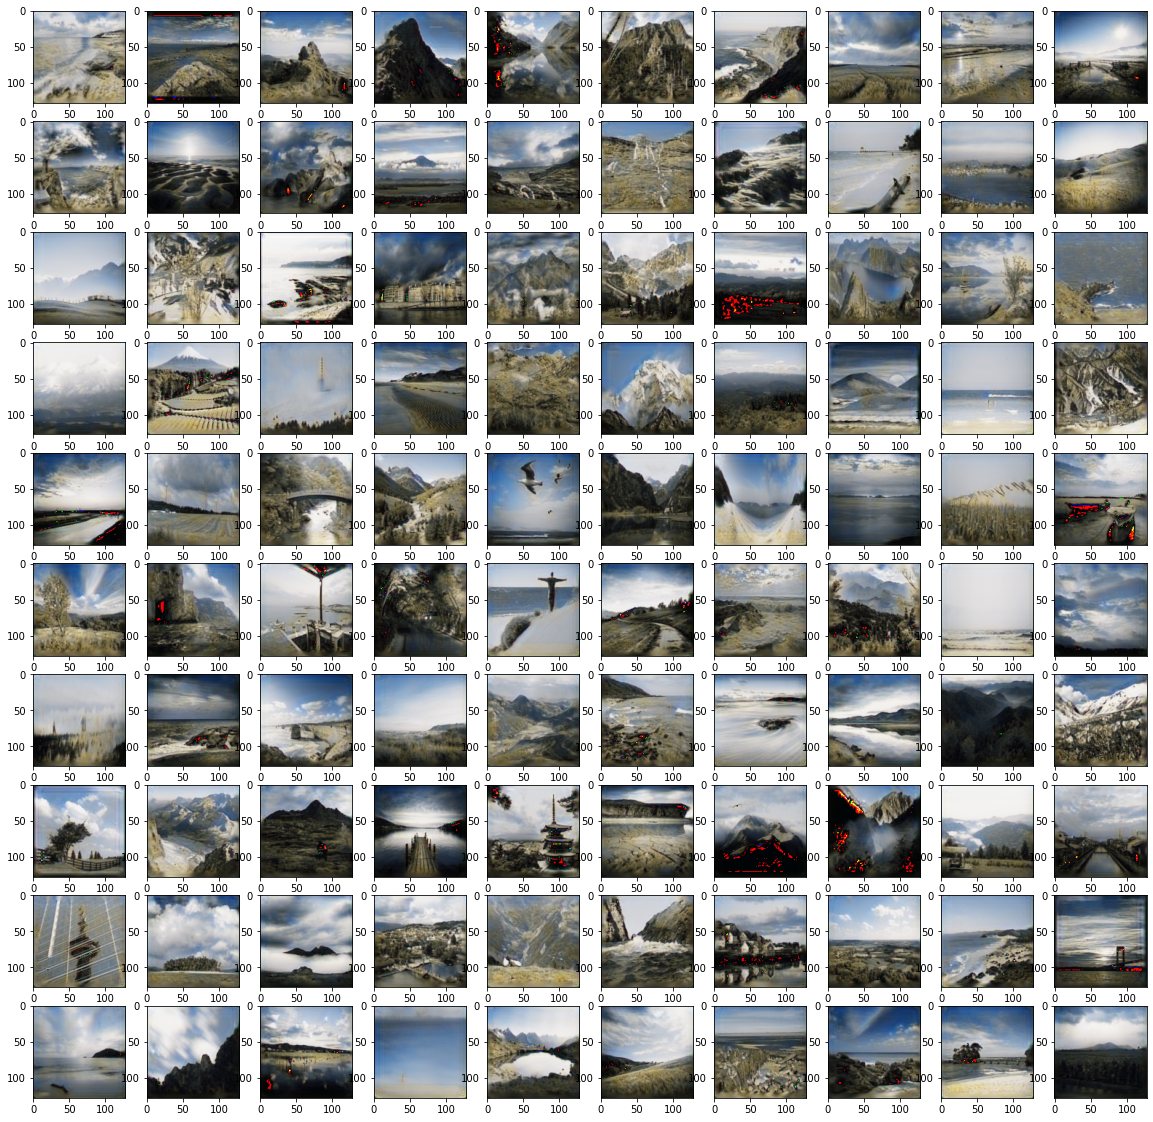

In [193]:
import matplotlib.pyplot as plt
from PIL import Image 
import PIL 

print('Generated results')
y = generator( test_x[ 0 : 100 ] ).numpy()

i = 14
plt.figure(figsize=(20, 20))
for i in range(100):
  name = str(i)
  image = Image.fromarray( ( y[i] * 255).astype( 'uint8' ) ) 
  image = np.asarray( image )
  plt.subplot(10, 10, i+1)
  plt.imshow( image )
  #imsave(name + "_color.jpg", image)
plt.show()

Original


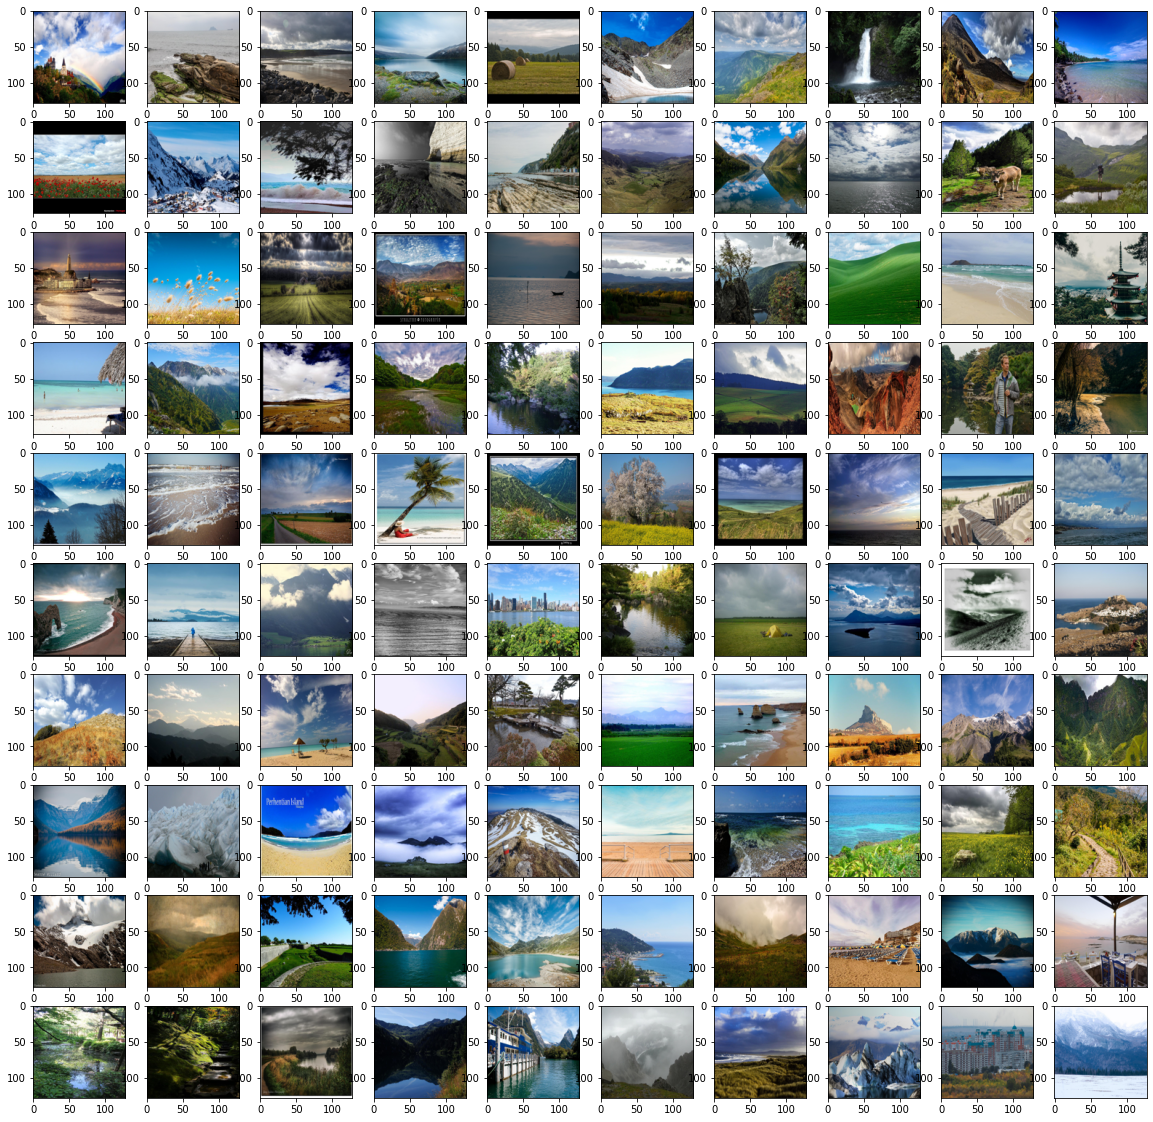

In [ ]:
print('Original')
plt.figure(figsize=(20, 20))
for i in range(100):
  name = str(i)
  image = Image.fromarray( ( test_y[i] * 255 ).astype( 'uint8' ) )
  image = np.asarray( image )
  plt.subplot(10, 10, i+1)
  plt.imshow( image )
  imsave(name + "_original.jpg", image)
plt.show()